# Requiared Library

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os

# Algorithm Flow
1. Convert Image To black and white image
2. Detect a Group of White pixels
3. Crop the image based on Region Of Interest that created from step 2
4. Template Matching image to group the image based on numbers and words
5. Train and create CNN model using the dataset from step 4
6. Use the CNN model to read words and number on the plate

# Pre-Processing Image (Experiment)

(600, 600, 3)


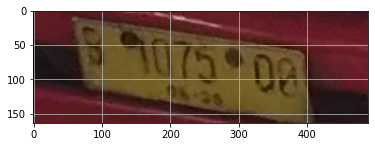

In [2]:
img = cv2.imread("assets/DataTrain/DataTrain25.png")
 
# * Resizing The Image to 600x600 pixel
resize = cv2.resize(img,[600,600])
print(resize.shape)

# * Converting color channel order from Blue Green Red to Red Green Blue 
im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)
plt.grid(True)

# ? enable this code to remove plot ticks
#plt.xticks([]), plt.yticks([])

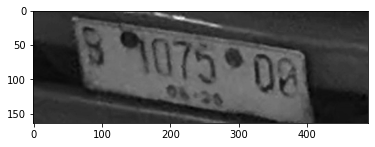

In [3]:

"""
 * Converting 3 Color Channel to 1 Channel of Grayscale
"""
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap="gray")

(<matplotlib.image.AxesImage at 0x2b995d83e20>, None)

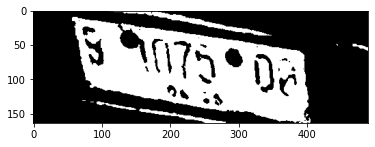

In [4]:

"""
* Converting Grayscale image to Black and White image using Thresh otsu technique
"""
ret, thresh = cv2.threshold(gray_img,0,255, cv2.THRESH_OTSU)

plt.imshow(thresh, cmap='binary_r'), plt.grid(False)

image 0 = [x : 399, y : 150, w : 4, h : 5, different of w and h : 1]
image 6 = [x : 444, y : 49, w : 2, h : 3, different of w and h : 1]


(<matplotlib.image.AxesImage at 0x2b995dfa670>, None)

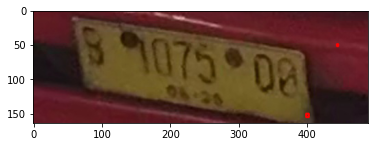

In [5]:

"""
    TODO : Still need more adjustment for detecting white Region

    * finContours() : A method to detect a group of white pixels in thresholded image
    - cv2.RETR_EXTERNAL : To prevent detecting child contours that can create rekursif contours 
    - cv2.CHAIN_APPROX_SIMPLE : one of contours finding technique that use approximation method

    * boundingRect() : A method to get x and y Axis and height and width of the ROI
    * rectangle() : A method to draw the ROI border
"""

contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
detected_contours = img.copy()

for i in range(len(contours)):
    x,y,w,h=cv2.boundingRect(contours[i])
    if h > w:
        print(f"image {i} = [x : {x}, y : {y}, w : {w}, h : {h}, different of w and h : {h-w}]")
        cv2.rectangle(detected_contours,(x,y),(x+w,y+h),(0,0,255), 2)

im_rgb = cv2.cvtColor(detected_contours, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb), plt.grid(False)

# Main Algorithm

In [6]:

def preprocessing(img):
    # * Resizing The Image to 600x600 pixel
    # resize = cv2.resize(img,[600,600])
    
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray_img,0,255, cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for i in range(len(contours)):
        x,y,w,h=cv2.boundingRect(contours[i])
        if h > w:
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255), 2)
    
    return img

In [7]:
directory = "assets/DataTrain/"
listOfImages = os.listdir(directory)
len(listOfImages)

collections = []
for i in range(1,len(listOfImages)):
    img = cv2.imread(f"assets/DataTrain/DataTrain{i}.png")
    collections.append(preprocessing(img))



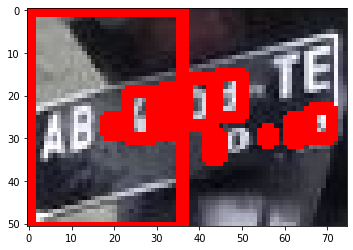

In [8]:
view =  cv2.cvtColor(collections[45], cv2.COLOR_BGR2RGB)
plt.imshow(view)

800


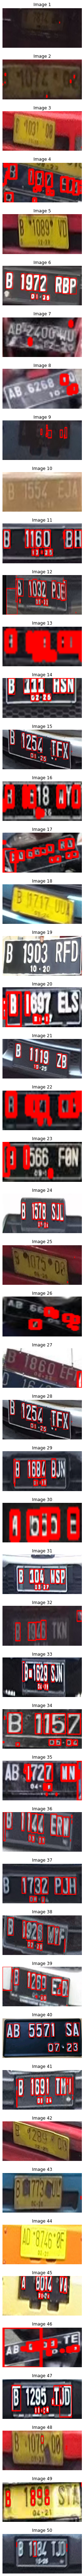

In [48]:

fig, axes = plt.subplots(nrows=50, ncols=1, figsize=(70, 100))
fig.subplots_adjust(left=0.1, bottom=1, right=1, top=2, wspace=0.5, hspace=0.3)

print(len(collections))

for i in range(50):
    # Plot the image
    axes[i].imshow(cv2.cvtColor(cv2.resize(collections[i],[600,300]), cv2.COLOR_BGR2RGB))
    axes[i].axis('off')
    axes[i].set_title(f'Image {i+1}')

# Adjust subplot layout
#plt.tight_layout()

# Show the plot
plt.show()